In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Librerias de los modelos supervisados
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

## Modelación sin balanceo de datos

In [6]:
df = pd.read_csv("./dataset/predictive_maintenance_transform.csv")
df

,Ubicación,Potencia,Autoprotección,Promedio de DDT,Máximo de DDT,tasa de quema,Criticidad-Nivel Ceráunico,Conectores amobibles,Tipo de clientes,Número de usuarios,EENS,Tipo de instalación,Red Aérea,Cola de circuito,km de red BT,Estado del transformador
0,1,112.5,0,3.155602,6.6,0.00,0,1,1,94,1822.5,1,1,0,0.32362,0
1,1,10.0,0,3.155602,6.6,0.00,0,1,2,1,270.0,1,1,0,0.30036,0
2,1,25.0,0,3.155602,6.6,0.00,0,1,1,74,405.0,1,1,0,0.29695,0
3,1,75.0,0,3.155602,6.6,0.00,0,1,3,30,1215.0,1,1,0,0.12575,0
4,1,75.0,0,3.155602,6.6,0.00,0,1,4,24,1215.0,1,1,1,0.16605,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,0,37.5,0,3.155602,6.6,0.00,0,0,5,30,796.5,2,1,0,0.80303,0
15869,0,37.5,0,4.148532,8.3,0.25,0,1,5,57,607.5,2,1,0,146419.00000,0
15870,0,25.0,0,3.850980,6.1,0.00,0,0,5,21,855.0,2,1,1,0.73990,0
15871,0,10.0,0,0.717021,2.5,0.00,1,1,5,10,162.0,2,1,0,176708.00000,0


## División del Dataset: train-test

In [7]:
dt_features = df.drop(columns = ["Estado del transformador"] , axis=1)
dt_target = df["Estado del transformador"]
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size = 0.2, random_state = 42, stratify=dt_target)

#### Normalización de los datos

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos Supervisados, Clasificación binaria

## Modelo 1: Regresión Logística

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

### Evaluación

In [10]:
y_pred_lr = log_reg.predict(X_test)

In [11]:
lr_train = round(log_reg.score(X_train,y_train)*100, 2)
lr_accuracy = round(accuracy_score(y_test, y_pred_lr)*100, 2)

print("Accuracy del entrenamiento :",lr_train, "%")
print("Accuracy del modelo :",lr_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 94.87 %
Accuracy del modelo : 94.74 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3014
           1       0.00      0.00      0.00       161

    accuracy                           0.95      3175
   macro avg       0.47      0.50      0.49      3175
weighted avg       0.90      0.95      0.92      3175

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


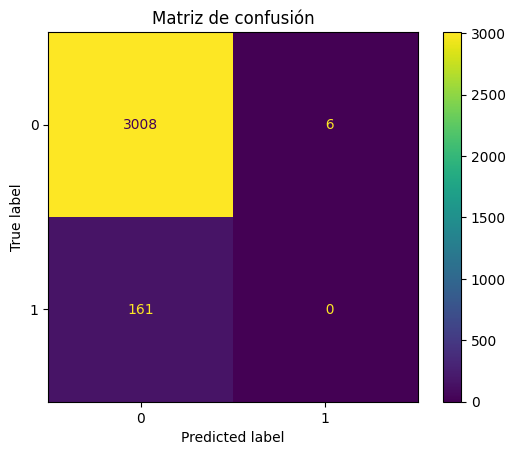

In [12]:
plot_confusion_matrix(log_reg, X_test, y_test, values_format='3g');
plt.title("Matriz de confusión")
plt.show()

## Modelo 2: Árbol de decision

In [13]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### evaluación

In [14]:
y_pred_dt = tree.predict(X_test)

In [15]:
dt_train = round(tree.score(X_train,y_train)*100, 2)
dt_accuracy = round(accuracy_score(y_test, y_pred_dt)*100, 2)

print("Accuracy del entrenamiento :",dt_train, "%")
print("Accuracy del modelo :",dt_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_dt))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 99.98 %
Accuracy del modelo : 90.99 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      3014
           1       0.19      0.24      0.21       161

    accuracy                           0.91      3175
   macro avg       0.57      0.59      0.58      3175
weighted avg       0.92      0.91      0.91      3175

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


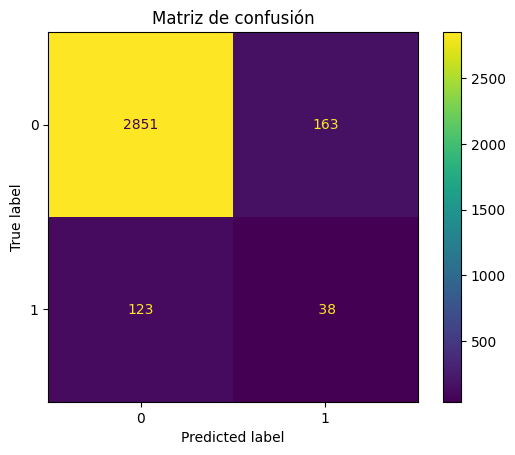

In [16]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(tree, X_test, y_test, values_format='3g');
plt.title("Matriz de confusión")
plt.show()

## Modelo 3: Bosques aleatorios

In [17]:
ran_for = RandomForestClassifier(n_estimators=100)
ran_for.fit(X_train, y_train)

RandomForestClassifier()

### Evaluación

In [18]:
y_pred_rf =ran_for.predict(X_test)

In [19]:
rf_train = round(ran_for.score(X_train,y_train)*100, 2)
rf_accuracy = round(accuracy_score(y_test, y_pred_rf)*100, 2)

print("Accuracy del entrenamiento :",rf_train, "%")
print("Accuracy del modelo :",rf_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 99.98 %
Accuracy del modelo : 94.93 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3014
           1       0.50      0.12      0.19       161

    accuracy                           0.95      3175
   macro avg       0.73      0.56      0.58      3175
weighted avg       0.93      0.95      0.93      3175

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


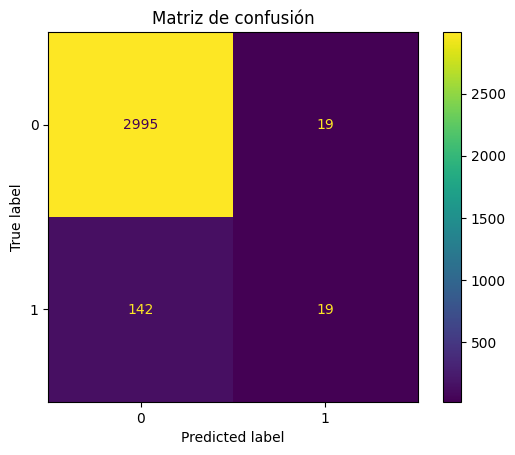

In [20]:
plot_confusion_matrix(ran_for, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()

## Modelo 4: Máquina de Vectores de Soporte

In [21]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

### Evaluación

In [22]:
y_pred_svc = svc.predict(X_test)

In [23]:
svc_train = round(ran_for.score(X_train,y_train)*100, 2)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100, 2)

print("Accuracy del entrenamiento :",svc_train, "%")
print("Accuracy del modelo :",svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 99.98 %
Accuracy del modelo : 94.93 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3014
           1       0.00      0.00      0.00       161

    accuracy                           0.95      3175
   macro avg       0.47      0.50      0.49      3175
weighted avg       0.90      0.95      0.92      3175

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


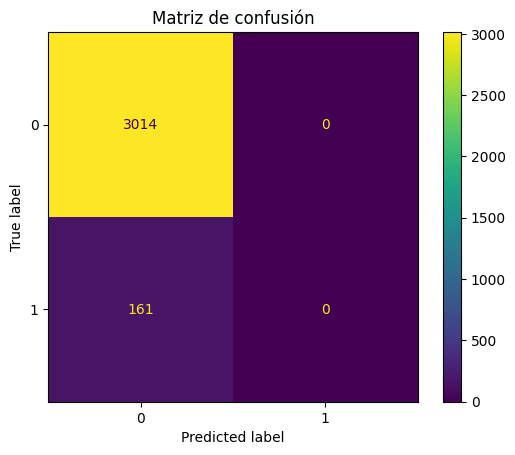

In [24]:
plot_confusion_matrix(svc, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()

## Modelo 5: K-vecinos cercanos

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluación

In [26]:
y_pred_knn = knn.predict(X_test)

In [27]:
knn_train = round(knn.score(X_train,y_train)*100, 2)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn)*100, 2)

print("Accuracy del entrenamiento :",knn_train, "%")
print("Accuracy del modelo :",knn_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 96.05 %
Accuracy del modelo : 94.49 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3014
           1       0.41      0.19      0.26       161

    accuracy                           0.94      3175
   macro avg       0.68      0.59      0.62      3175
weighted avg       0.93      0.94      0.94      3175

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


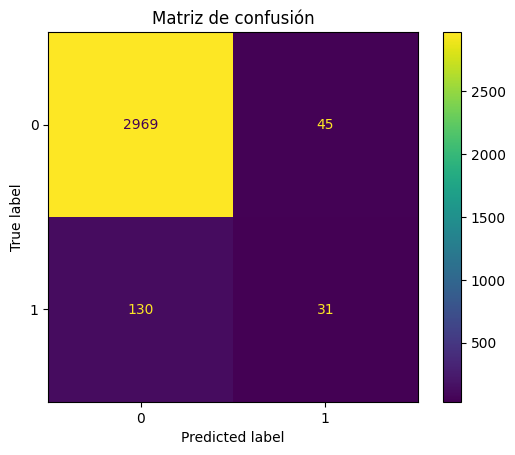

In [28]:
plot_confusion_matrix(knn, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()